In [49]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from math import exp
from scipy.optimize import leastsq
def graph(formula, x_range):
    x = np.array(x_range)
    y = eval(formula)
    plt.plot(x, y)
    plt.xscale('log')
    plt.show

* A = 0.0482
* B = 1.16
* C = 159
* D = 2.39

4-parameter logistic equation. A, B, C, and D were generated by Softmax Pro.
Y = D + (A - D)/(1 + (x/C)^B). A = lower asymptote, B = inflection point, C = slope, D = upper asymptote

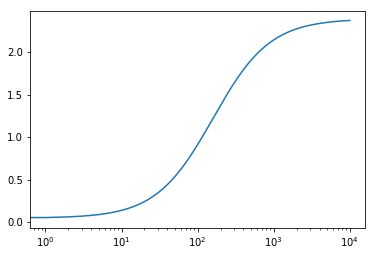

In [50]:
graph('2.39 + (0.0482 - 2.39)/(1 + (x/159)**1.16)', range(0, 10000))

* 0, 0.047
* 13, 0.175
* 52, 0.552
* 210, 1.408
* 840, 2.093

In [51]:
x = [0.001, 13, 52, 210, 840]
y = [0.047, 0.175, 0.552, 1.408, 2.093]

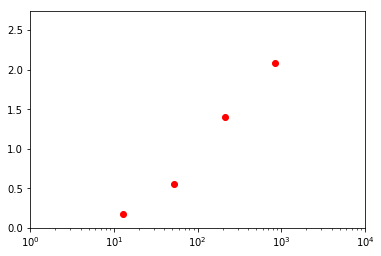

In [52]:
plt.plot(x, y, 'ro')
plt.xscale('log')
plt.axis([1, 10000, 0, 1.25*2.2])
plt.show()

    I think the first thing I need to do is try to learn how to draw a best fit line when the X is on logarithmic scale, and when the X and Y axis' are both on a logarithmic scale. This is probably a good first aproximation.


[  4.87564686e-02   1.15527848e+00   1.59016895e+02   2.39218101e+00]


[1, 8400, 0, 2.61625]

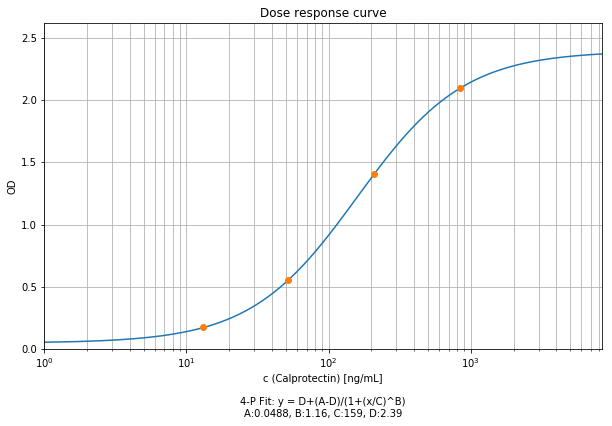

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def logistic4(x, A, B, C, D):
    """4PL logistic equation."""
    return D + (A-D)/(1 + (x/C)**B)

x = [0.001, 13, 52, 210, 840]
y = [0.047, 0.175, 0.552, 1.408, 2.093]

# Initial guess for parameters
p0 = [y[0], 0.01, 0.01, y[-1]]

# Fit equation using least squares optimization
popt, pcov = curve_fit(logistic4, x, y)#, p0)

# Calculate R^2
#+    "Boltzmann = [(1/(1+exp((V - x)/Slope))) for x in independent]\n",
#+    "function = Boltzmann"
#def r_square_calc():
#    return(1 - sum([(x_val - y_val)**2 for x_val, y_val in zip(x, function)])/sum([(x - Mean_of_y)**2 for x in dependent]))\n",
#r_square = r_square_calc()

print(popt)

xCont = np.linspace(0.001, 10*max(x), 10000)
fittedData=[logistic4(xVal, *popt) for xVal in xCont]
fig1 = plt.figure(figsize=(10,6))
ax=fig1.add_subplot(1,1,1)
ax.plot(xCont, fittedData)
ax.set_ylabel("OD")
ax.set_xlabel("c (Calprotectin) [ng/mL]\n\n4-P Fit: y = D+(A-D)/(1+(x/C)^B)\nA:{0:0.3g}, B:{1:0.3g}, C:{2:0.3g}, D:{3:0.3g}".format(*popt))
ax.grid(True, which='both')
ax.set_title("Dose response curve")
plt.xscale('log')
plt.plot(x, y, 'o')
plt.axis([1, 10*max(x), 0, 1.25*max(y)])


[  9.73367195e+01   9.86853716e+01  -7.99827891e-03]
[[  7.28014130e+00   5.55658116e+00   1.59027635e-03]
 [  5.55658116e+00   9.87606726e+00   5.14102604e-04]
 [  1.59027635e-03   5.14102604e-04   6.21028849e-07]]


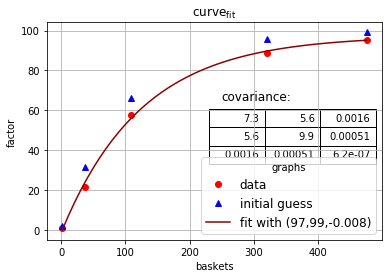

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from scipy.optimize import curve_fit #we could import more, but this is what we need
###defining your fitfunction
def func(x, a, b, c):
    return a - b* np.exp(c * x) 
###OP's data
baskets = np.array([475, 108, 2, 38, 320])
scaling_factor = np.array([95.5, 57.7, 1.4, 21.9, 88.8])
###let us guess some start values
initialGuess=[100, 100,-.01]
guessedFactors=[func(x,*initialGuess ) for x in baskets]
###making the actual fit
popt,pcov = curve_fit(func, baskets, scaling_factor,initialGuess)
#one may want to
print(popt)
print(pcov)
###preparing data for showing the fit
basketCont=np.linspace(min(baskets),max(baskets),50)
fittedData=[func(x, *popt) for x in basketCont]
###preparing the figure
fig1 = plt.figure(1)
ax=fig1.add_subplot(1,1,1)
###the three sets of data to plot
ax.plot(baskets,scaling_factor,linestyle='',marker='o', color='r',label="data")
ax.plot(baskets,guessedFactors,linestyle='',marker='^', color='b',label="initial guess")
ax.plot(basketCont,fittedData,linestyle='-', color='#900000',label="fit with ({0:0.3g},{1:0.3g},{2:0.3g})".format(*popt))
###beautification
ax.legend(loc=0, title="graphs", fontsize=12)
ax.set_ylabel("factor")
ax.set_xlabel("baskets")
ax.grid()
ax.set_title("$\mathrm{curve}_\mathrm{fit}$")
###putting the covariance matrix nicely
tab= [['{:.2g}'.format(j) for j in i] for i in pcov]
the_table = plt.table(cellText=tab,
                  colWidths = [0.2]*3,
                  loc='upper right', bbox=[0.483, 0.35, 0.5, 0.25] )
plt.text(250,65,'covariance:',size=12)
###putting the plot
plt.show()
###done

In [ ]:
+    "independent = [-60, -55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30]\n",
+    "dependent = [0, 0, 0.05, 0.08, 0.1, 0.15, 0.18, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.89, 0.9, 0.95, 1]"
+   ]
+  },
+  {
+   "cell_type": "code",
+   "execution_count": 15,
+   "metadata": {},
+   "outputs": [
+    {
+     "name": "stdout",
+     "output_type": "stream",
+     "text": [
+      "[-60, -55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30]\n",
+      "[0, 0, 0.05, 0.08, 0.1, 0.15, 0.18, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.89, 0.9, 0.95, 1]\n"
+     ]
+    }
+   ],
+   "source": [
+    "print(independent)\n",
+    "print(dependent)"
+   ]
+  },
+  {
+   "cell_type": "code",
+   "execution_count": 29,
+   "metadata": {},
+   "outputs": [],
+   "source": [
+    "V = -20\n",
+    "Slope = 10\n",
+    "Mean_of_y = mean(dependent)\n",
+    "# df = 17 # Degrees of freedom is the number of data points minus the number of parameters, in this case V and Slope."
+   ]
+  },
+  {
+   "cell_type": "code",
+   "execution_count": 46,
+   "metadata": {},
+   "outputs": [],
+   "source": [
+    "Boltzmann = [(1/(1+exp((V - x)/Slope))) for x in independent]\n",
+    "function = Boltzmann"
+   ]
+  },
+  {
+   "cell_type": "code",
+   "execution_count": 47,
+   "metadata": {},
+   "outputs": [],
+   "source": [
+    "def r_square_calc():\n",
+    "    return(1 - sum([(x - y)**2 for x, y in zip(dependent, function)])/sum([(x - Mean_of_y)**2 for x in dependent]))\n",
+    "r_square = r_square_calc()"
+   ]